<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Multimodal Large Language Models
</h1>


<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Setup
</h2>


In [1]:
# # %%capture
# !pip install matplotlib transformers datasets accelerate sentence-transformers
# !pip install ipywidgets

<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Introduction
</h2>



**Multimodal models** are advanced AI systems capable of processing and integrating multiple types, or **modalities**, of data, such as text, images, audio, and even video. Traditional **large language models (LLMs)** are designed primarily to work with text data. However, enabling these models to handle various forms of data significantly broadens their utility and real-world applicability.

For instance, a multimodal model can:
- **Analyze Images**: Interpret visual content and answer questions about images.
- **Process Audio**: Understand spoken language or identify sounds, enabling interaction through speech.
- **Combine Modalities**: Take inputs from both text and images, providing responses that integrate information from both sources.

By handling multiple modalities, multimodal models can perform complex tasks, such as:
- **Image Captioning**: Generating a description of an image.
- **Visual Question Answering**: Answering questions about specific elements in an image.
- **Speech Recognition and Synthesis**: Converting spoken language to text and vice versa.


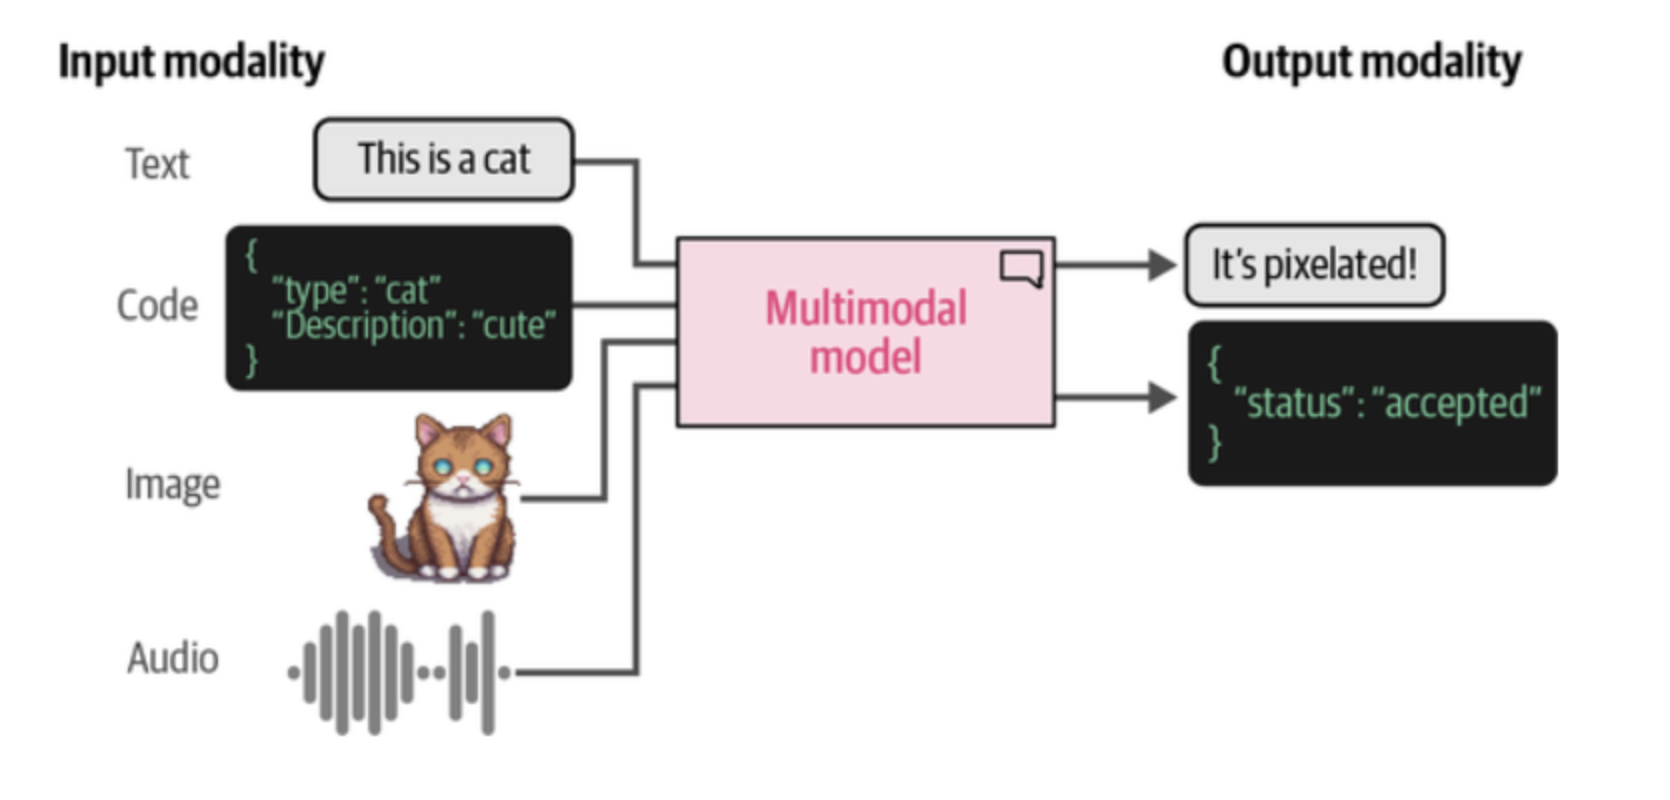

<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border-left: 6px solid #4682B4;">
    <strong>How can we have images have a numerical representation such that we can make it work with the original <code>Transformer</code> technique?</strong> And how LLMs can be extended to include vision tasks using this Transformer.
</div>


<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Transformers for Vision
</h2>


Both the original `Transformer` and the `Vision Transformer` process **unstructured data** by converting it into **numerical representations**, which are then used for tasks like classification.

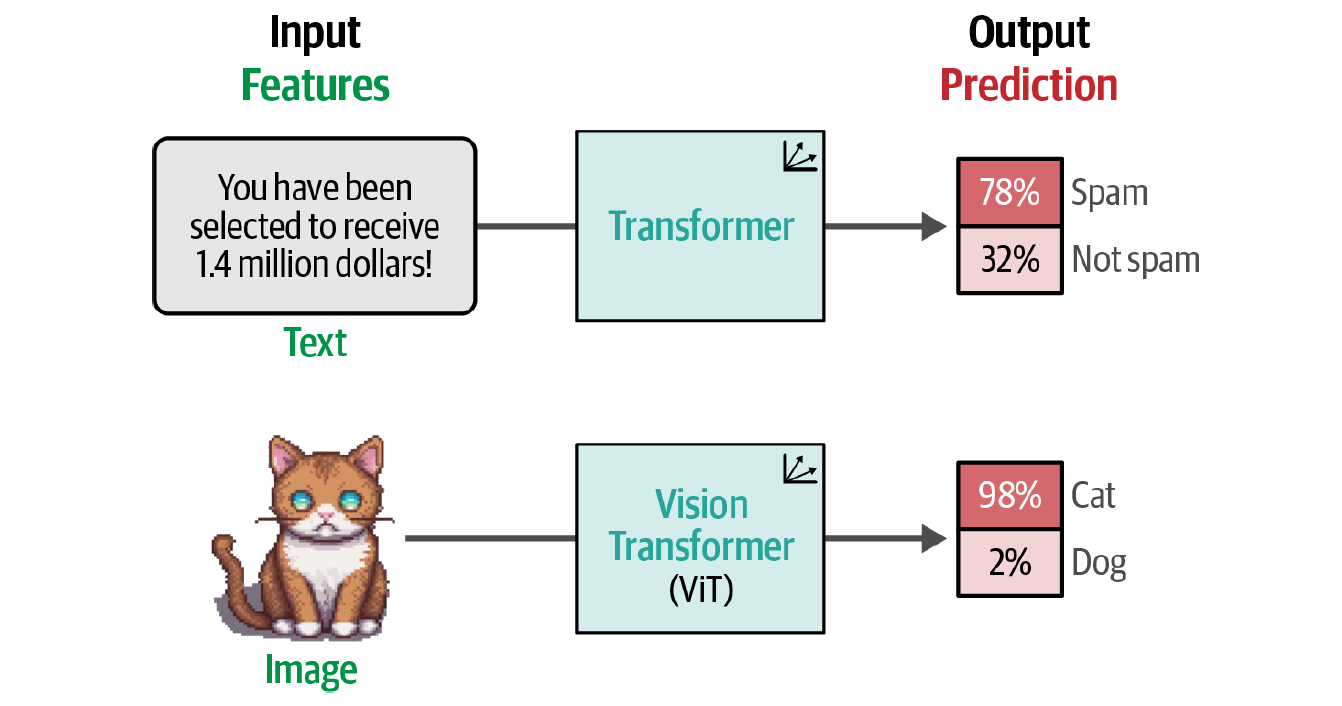

- **Textual Input**: The sentence "Have a great day!" is used as an example of textual input.
- **Tokenization**: The text is tokenized into individual units (tokens) using a tokenizer, breaking it down into components like `[CLS]`, "have," "a," "great," "day," "!" and `[SEP]`. This tokenization is essential for preparing the text for encoding.
- **Encoding**: Once tokenized, the tokens are passed to one or more **encoders** within the Transformer model, which processes these tokens to generate numerical representations used in downstream tasks like classification.


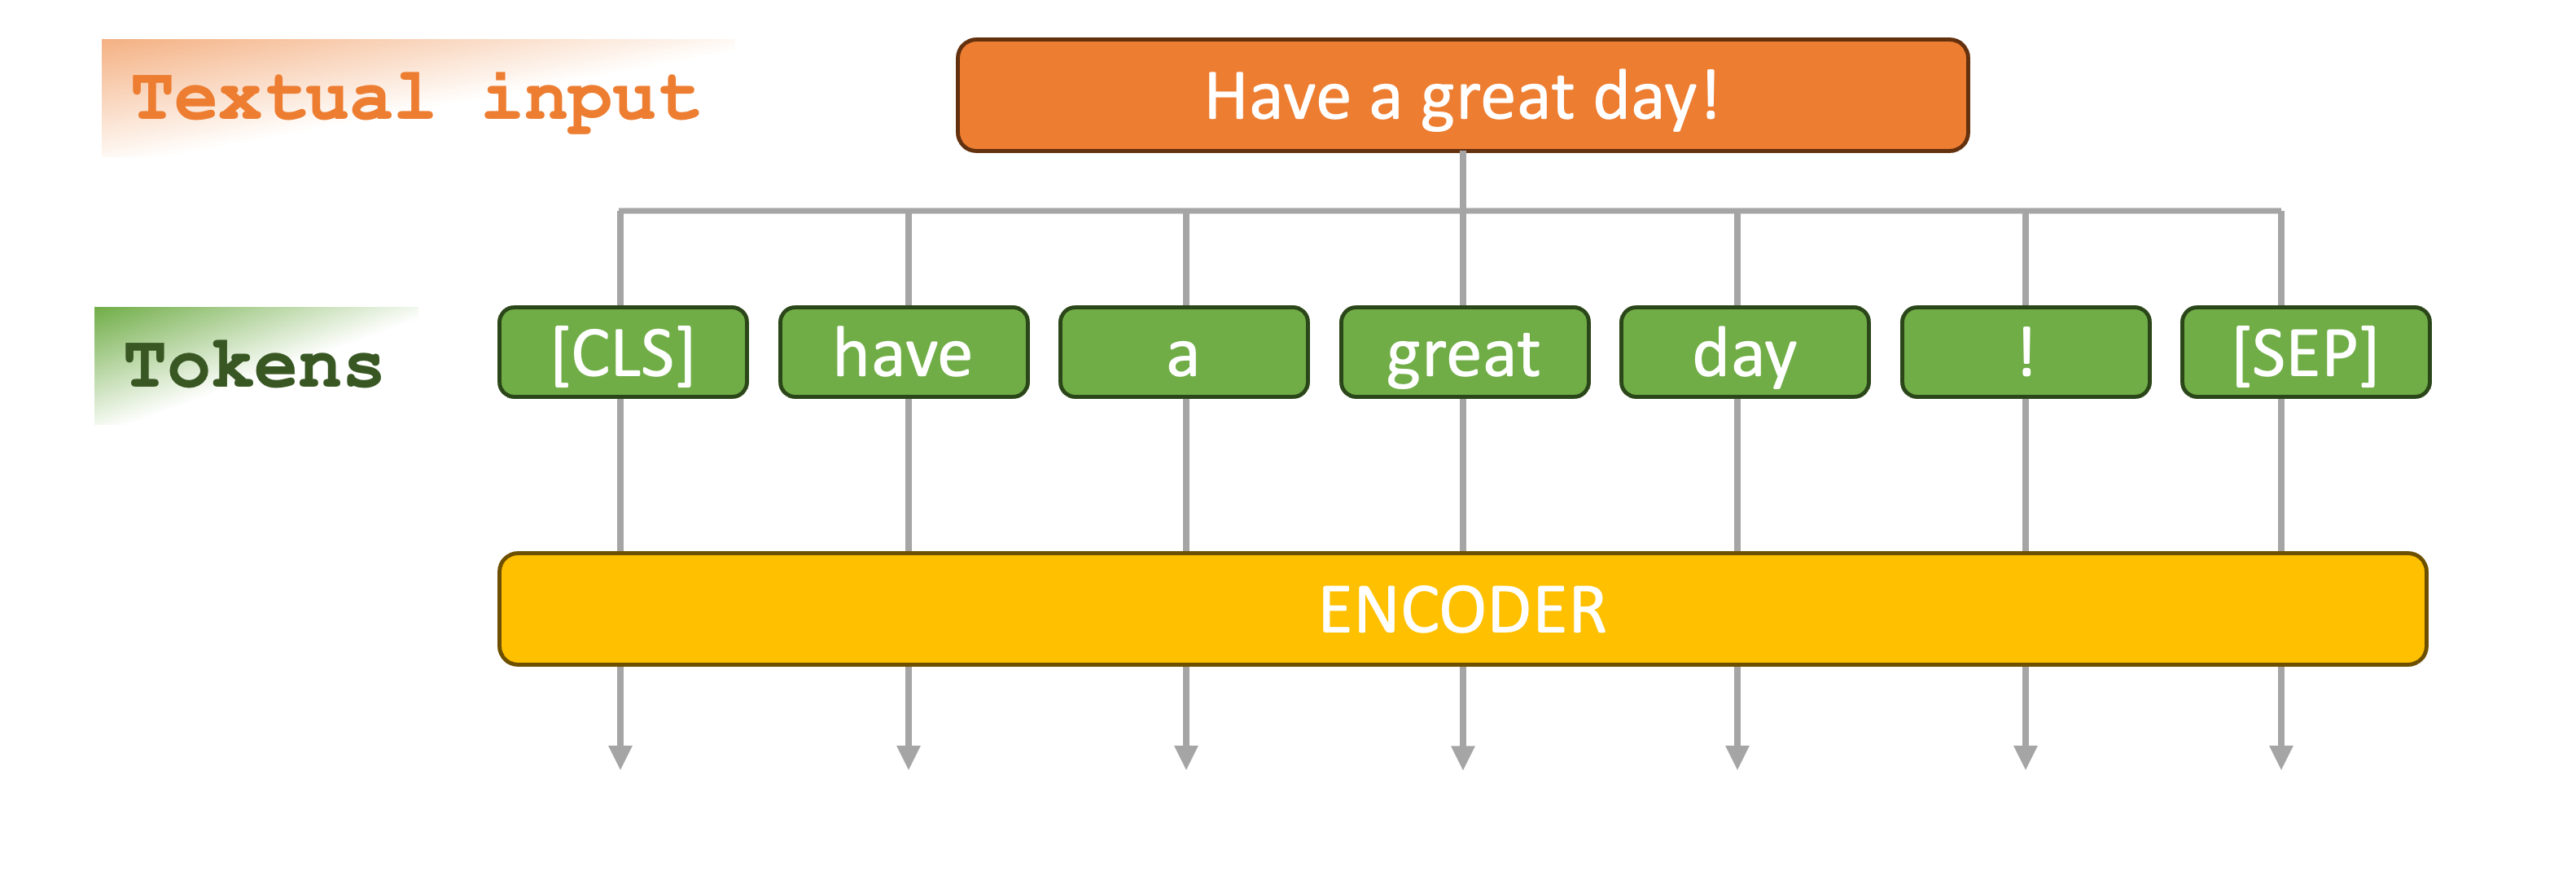

<div style="background-color:#f9f9f9; padding: 15px; border-radius: 10px; border-left: 6px solid #4682B4;">
    <strong>Challenge with Images:</strong> Unlike text, images do not consist of words, so the standard text-based tokenization approach cannot be directly applied to visual data.<br><br>
    <strong>Vision Transformer (ViT) Solution:</strong> To address this, the authors of the Vision Transformer (ViT) developed a method to <strong>tokenize images</strong> by dividing them into smaller patches or “words.” This allows images to be processed through the original Transformer encoder structure, making it possible to apply the self-attention mechanism to image data.
</div>


## Vision Transformer (ViT)

- Transformers for Vision, specifically the **Vision Transformer (ViT)**, adapt the Transformer architecture
- Originally designed for language processing—to work with images.
- Unlike traditional convolutional neural networks (CNNs), which have been the standard for image recognition, Vision Transformers divide images into smaller patches and convert these patches into numerical representations, similar to how text is tokenized for NLP models.
- In this approach, the **encoder component** of the Transformer takes these image patches as input, transforming them into a format that the model can process. This allows the Vision Transformer to perform tasks like **image classification** effectively, using the same self-attention mechanisms that made Transformers successful in language tasks.
- ViT has shown strong performance in image recognition tasks, sometimes surpassing CNNs by leveraging the flexibility and scalability of Transformer architectures.


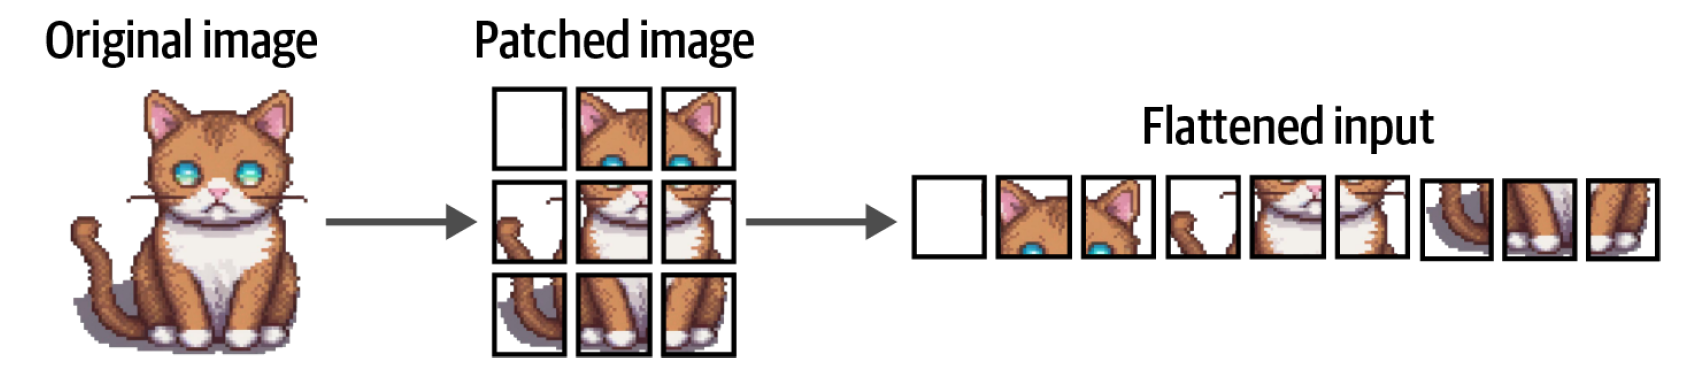
The images in the examples were patched into `3 × 3 patches` but the **original implementation** used `16 × 16 patches`
**The flattened input of image patches can be thought of as the tokens in a piece of text.**

However, unlike tokens, we cannot just assign each
patch with an ID since these patches will rarely be found in other images, unlike the
vocabulary of a text.

Instead, the patches are linearly embedded to create numerical representations, namely embeddings. These can then be used as the input of a Transformer model.

So with this approch, the moment the embeddings are passed to the encoder, they are treated as if they were textual tokens. From that point
forward, there is no difference in how a text or image trains.

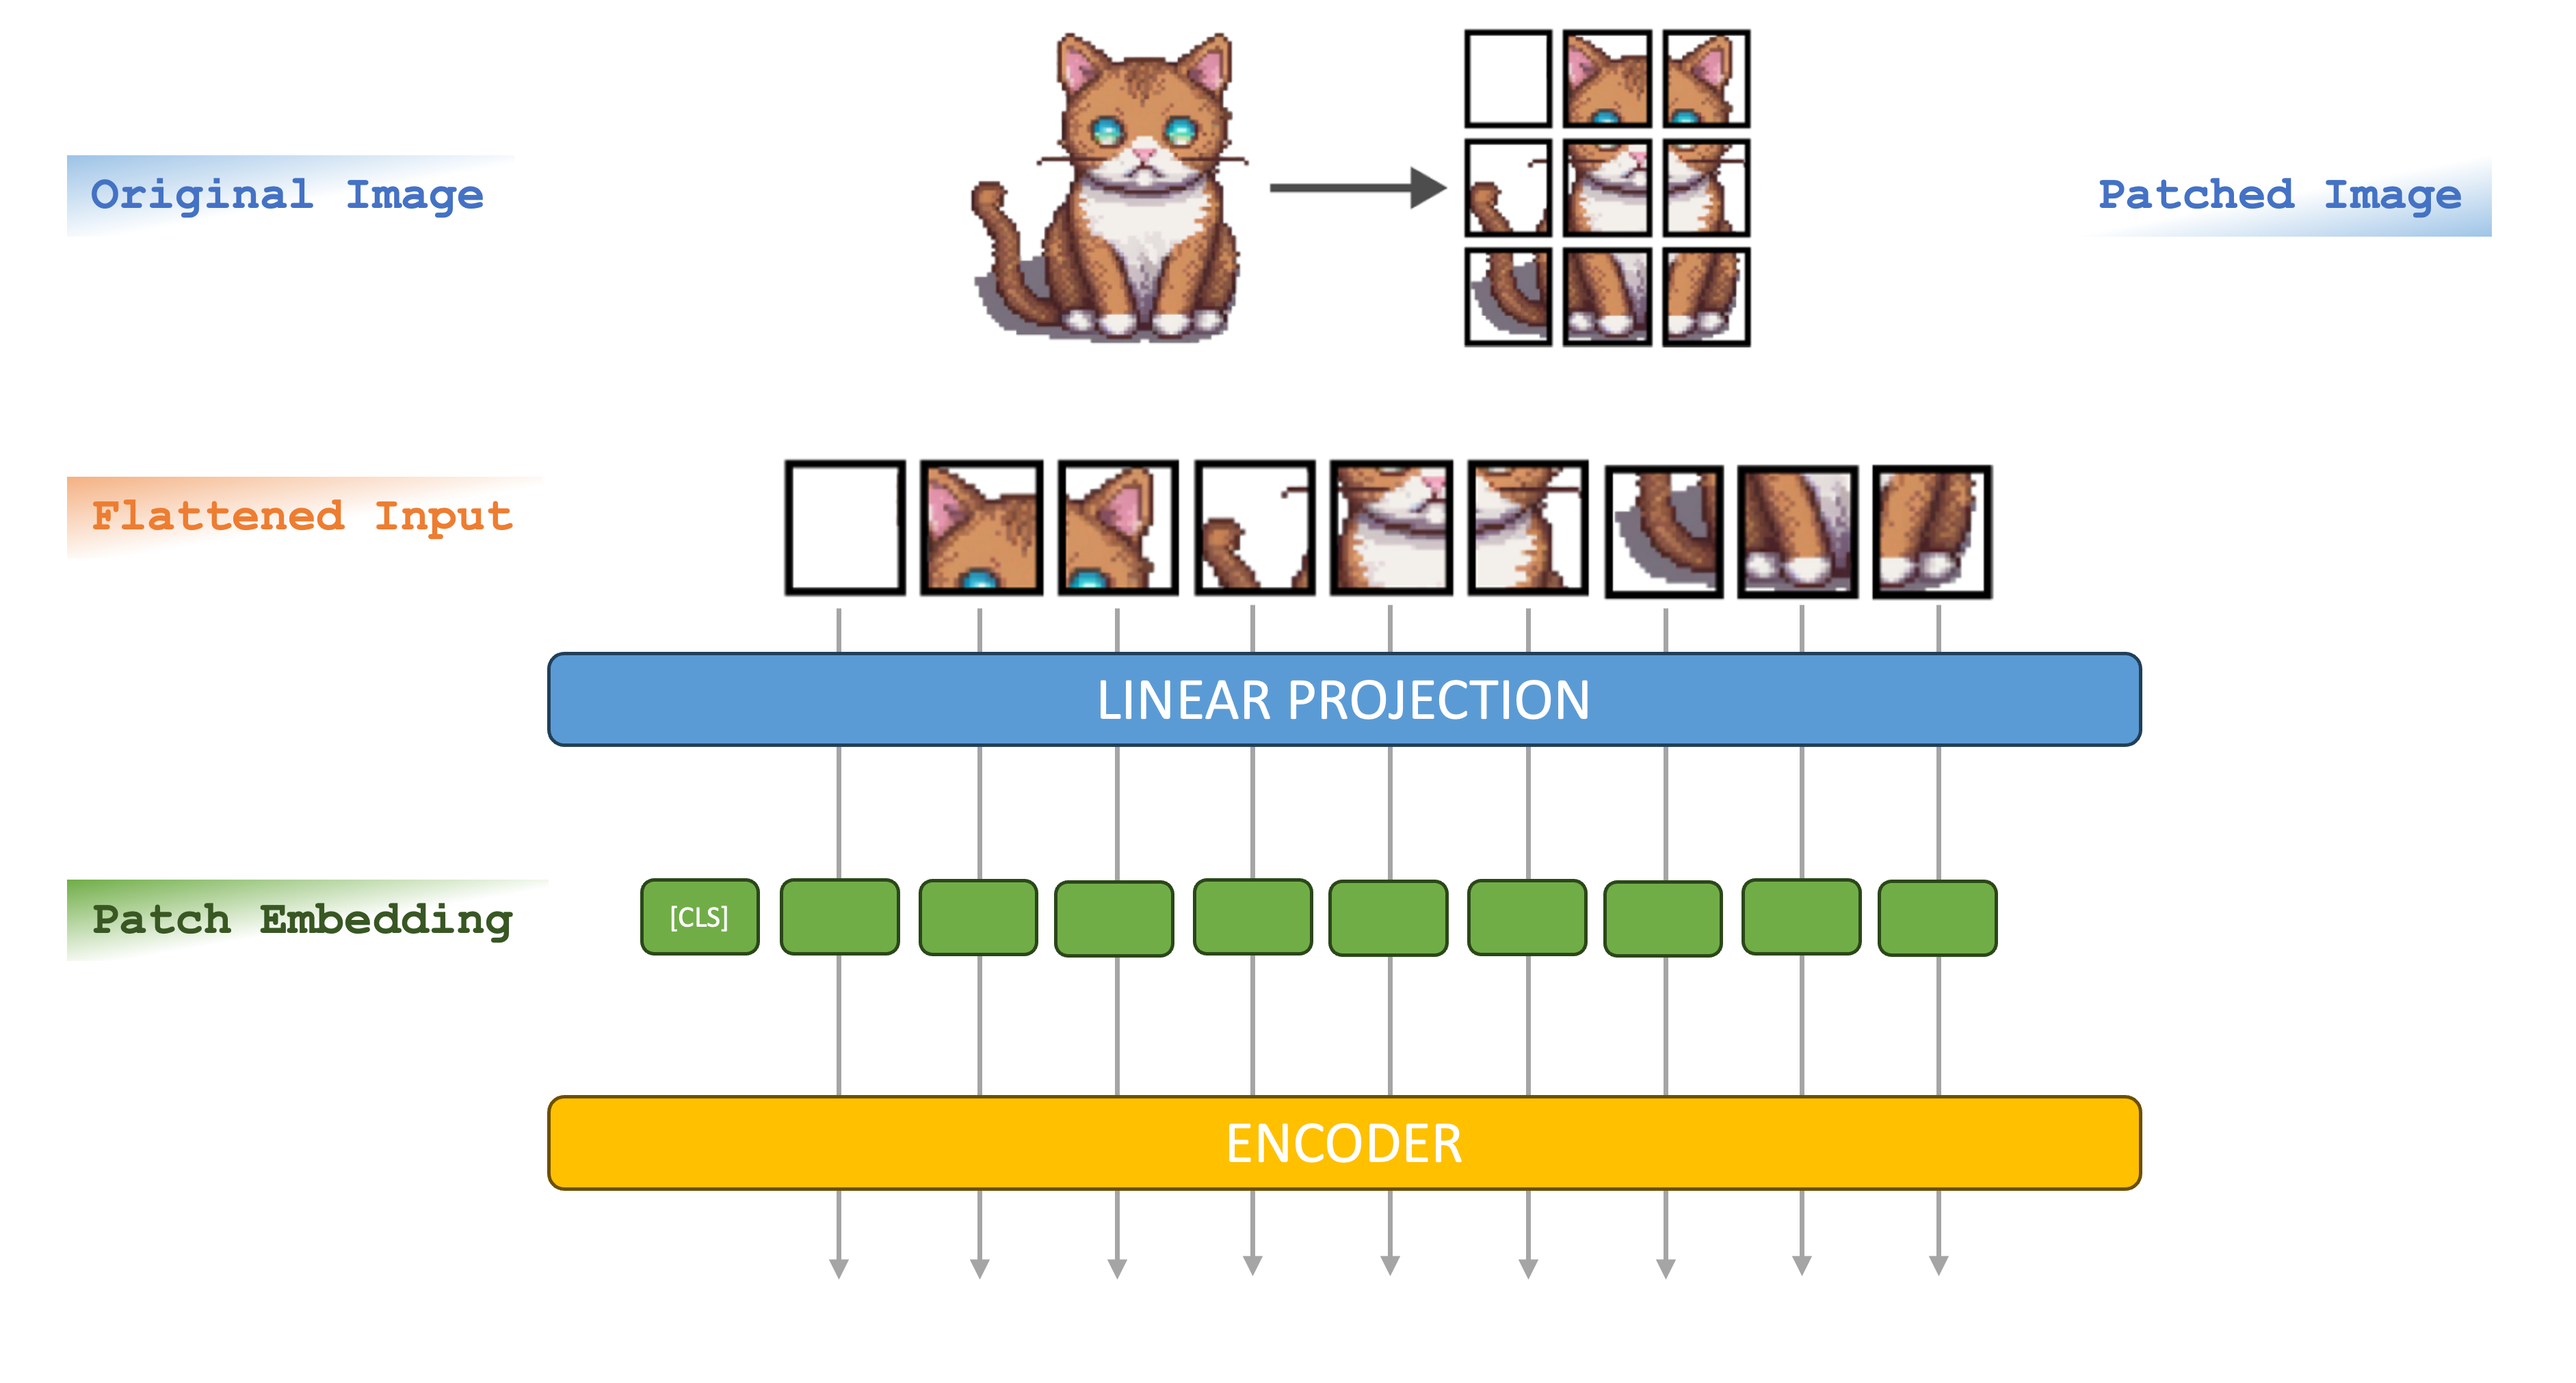
The main algorithm behind ViT. After patching the images and linearly
projecting them, the patch embeddings are passed to the encoder and treated as if they
were textual tokens.

![patches](imgs/patches.png)

[Image Source](https://github.com/nerminnuraydogan/vision-transformer/tree/main)

<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Multimodal Embedding Models
</h2>


## Multimodal Embedding Models

Multimodal embedding models are designed to capture and represent information from multiple data types, or "modalities," such as text and images. While traditional embedding models focus on generating embeddings (numerical representations) for text alone, multimodal embeddings allow for the integration of various forms of data into a shared **vector space**.

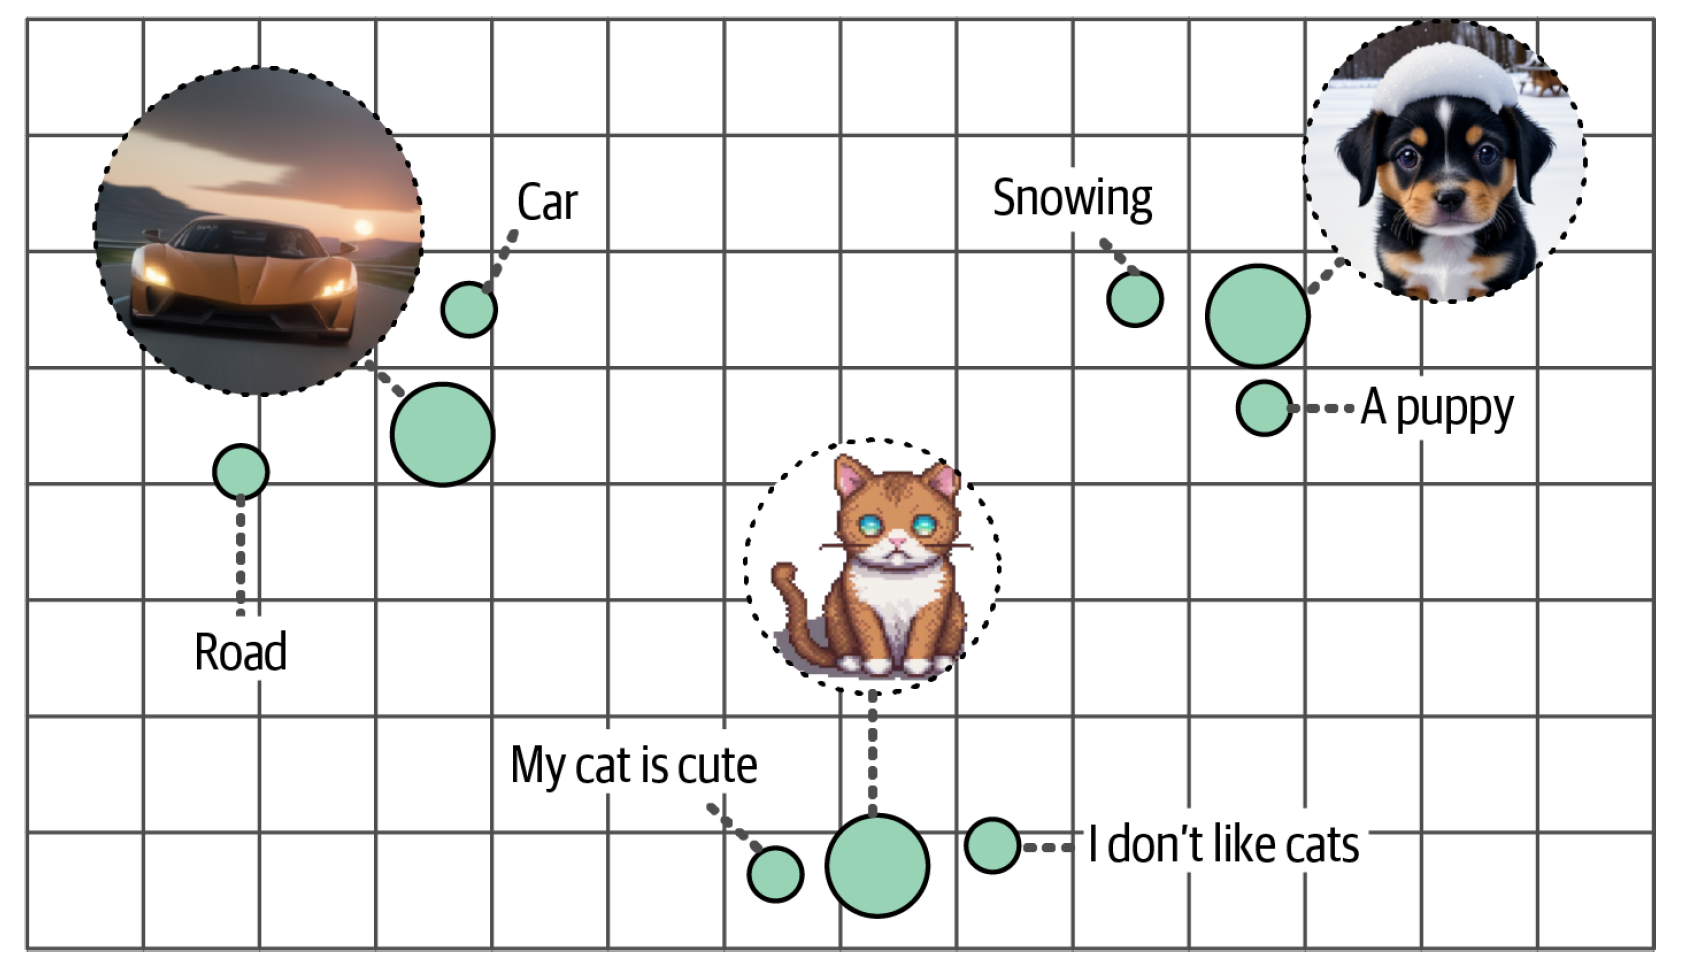

#### Key Concepts

- **Unified Representation**: Multimodal embeddings enable us to map different types of data, like sentences and images, into the same vector space. This means that similar content, regardless of modality, can be placed closer together in this shared space. For example, the sentence "This is a cat" and an image of a cat can have embeddings that lie near each other in the vector space.
  
- **Cross-Modal Search and Retrieval**: By embedding both text and images in the same vector space, we can perform cross-modal searches. This allows us to search for images using text descriptions or find textual documents based on visual input. For instance, using a multimodal embedding model, we could search for "pictures of a puppy" and retrieve relevant images of puppies, or vice versa, find relevant text descriptions for a given image.

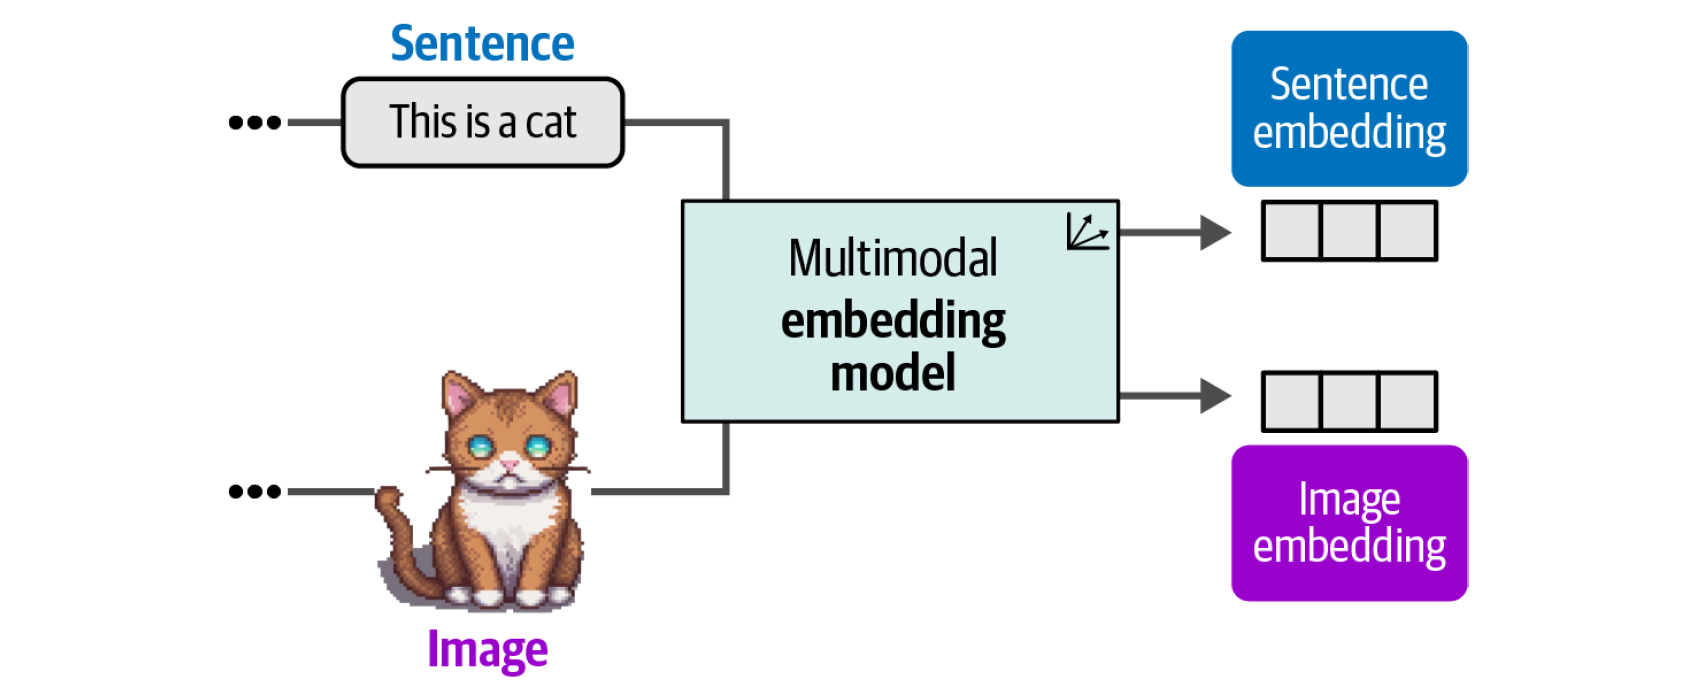

#### Advantages of Multimodal Embeddings

- **Comparative Analysis Across Modalities**: Since multimodal embeddings lie in the same vector space, we can directly compare and analyze them. This capability is useful for tasks like image-to-text matching, visual question answering, and content recommendation that involve more than one modality.
  
- **Rich Semantic Understanding**: Multimodal embedding models can capture deeper semantic relationships by understanding content across different modalities. For example, we can find connections between a visual concept (like an image of a puppy) and related text content (like articles about pets).

#### Practical Applications

- **Content-Based Retrieval**: Multimodal embeddings allow for sophisticated content retrieval systems that can match visual data to textual queries or vice versa.
- **Recommendation Systems**: They can enhance recommendation engines by associating images and descriptions, helping users find content that matches their interests, regardless of whether they search using text or visual input.
- **Enhanced Information Search**: This approach is particularly useful in scenarios where users want to explore related content across formats, such as looking for related documents, images, or videos based on a concept or query.


There are a number of multimodal embedding models, but the most well-known and
currently most-used model is Contrastive Language-Image Pre-training (CLIP).

## Contrastive Language-Image Pre-training (CLIP)

### Connecting Text and Images

**CLIP** (Contrastive Language–Image Pretraining) is a multimodal embedding model developed to connect images and text by embedding both into a shared **vector space**. This allows the embeddings of images and text to be directly comparable, enabling a wide range of tasks that involve both visual and textual data.

#### Key Features of CLIP

- **Unified Vector Space**: By placing both image and text embeddings in the same vector space, CLIP enables easy comparison between the two. This shared space means that similar images and text descriptions will have embeddings that are close together, which supports tasks like:
  - **Zero-Shot Classification**: Matching an image to the description of its possible classes to identify the most similar one.
  - **Clustering**: Grouping images and text based on similarity, allowing them to be organized by concept.
  - **Search**: Rapidly finding relevant images or text based on a query from either modality.
  - **Generation**: Using multimodal embeddings as inputs for generating images from textual prompts or vice versa.

#### How CLIP Generates Multimodal Embeddings

1. **Dataset Requirements**: To train CLIP, a large dataset of paired images and text captions is needed. For example, an image of a cat might be paired with the caption “A pixelated image of a cute cat.” This provides a context for the model to learn associations between visual and textual information.

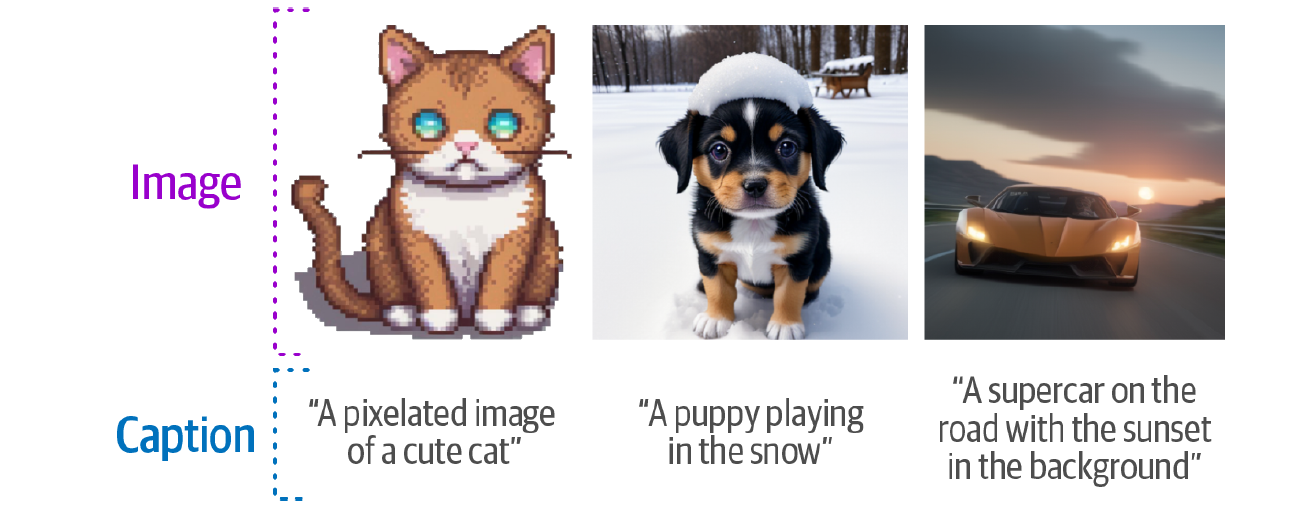

2. **Encoding Process**:
   - **Text Encoder**: Converts text descriptions into embeddings.
   - **Image Encoder** (using ViT, or Vision Transformer): Converts images into embeddings.
   - Both encoders create embeddings for each image-text pair, positioning them in the same vector space.
     
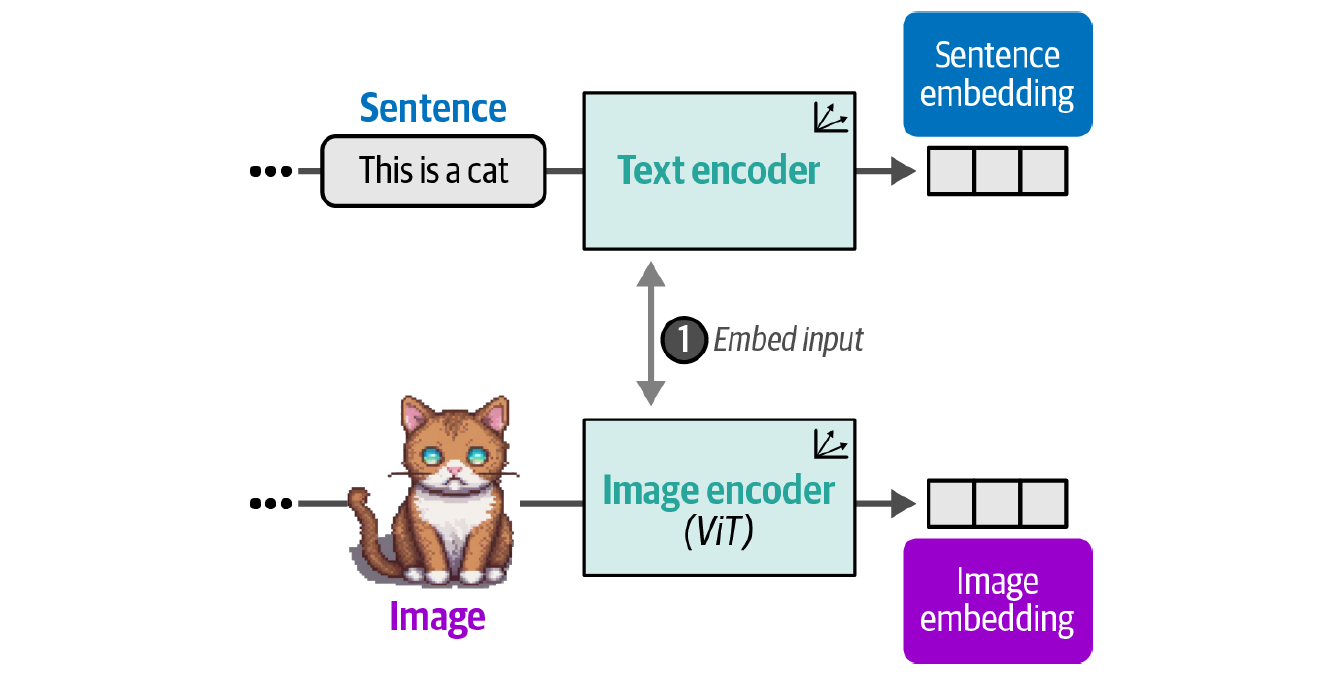

3. **Cosine Similarity**: The similarity between the image and text embeddings is measured using cosine similarity, which calculates the cosine of the angle between two vectors. High cosine similarity indicates that the image and text embeddings are closely related.

4. **Contrastive Learning**: CLIP uses contrastive learning to optimize the similarity between matching image-text pairs and reduce the similarity for non-matching pairs. This process iterates over multiple batches of data:
   - **Positive Pairing**: Increases similarity for corresponding image-caption pairs.
   - **Negative Pairing**: Decreases similarity for mismatched pairs, which helps the model distinguish between similar and dissimilar items.
     
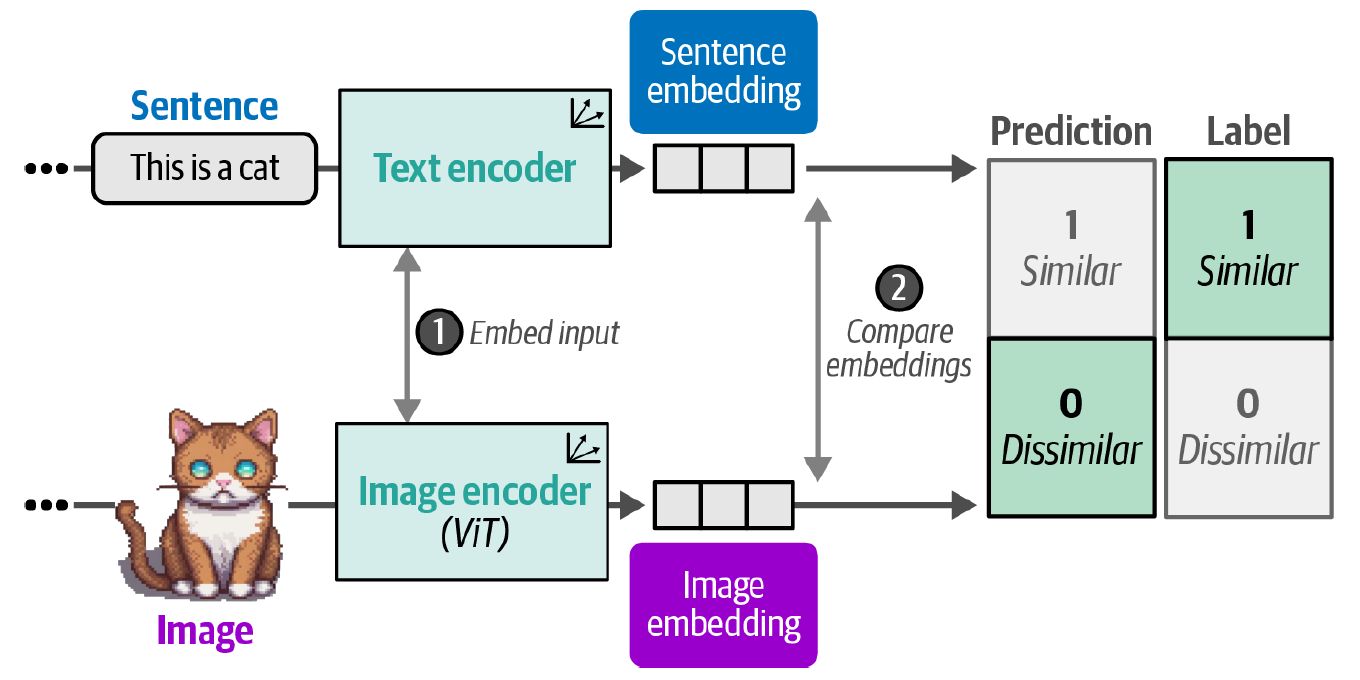

5. **Iterative Optimization**: The model continuously updates its parameters to align embeddings of similar content while distancing dissimilar ones. This process improves CLIP’s ability to generalize and accurately match images with relevant text.

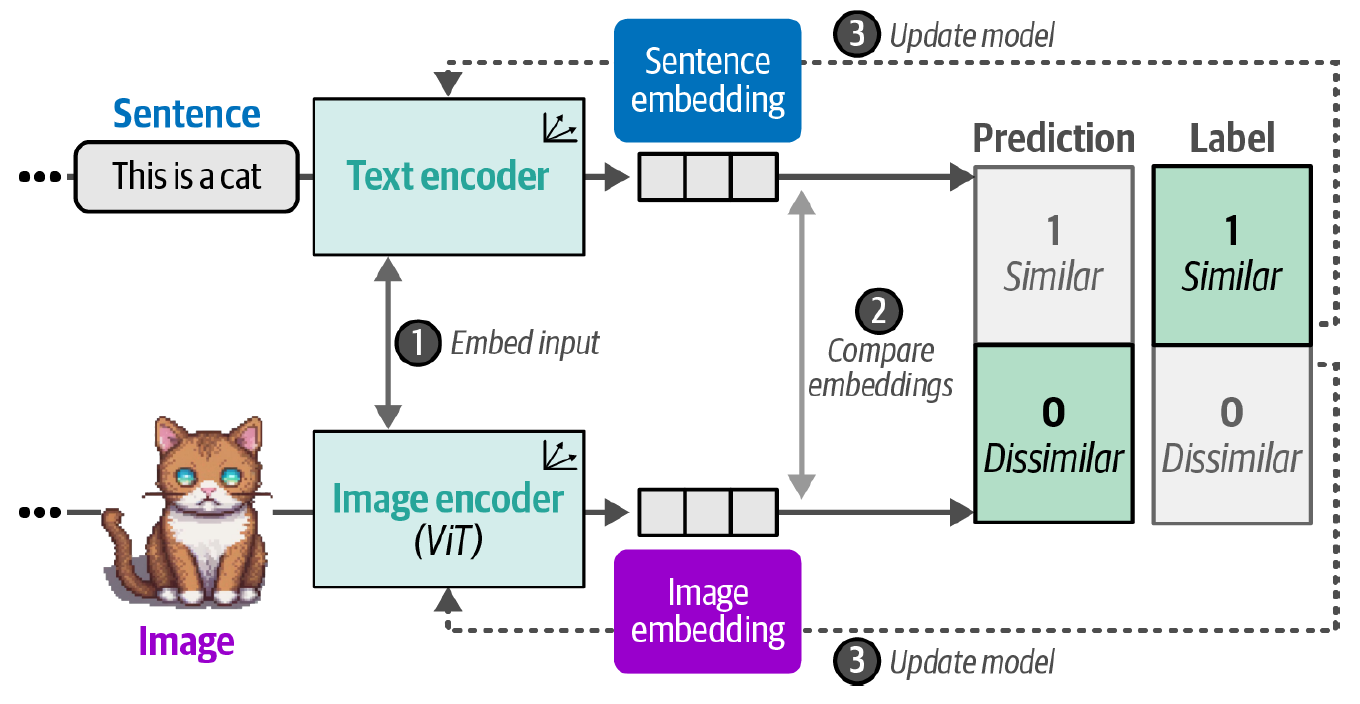

#### Practical Outcomes of CLIP Training

- After training, CLIP can embed an image of a cat and the text "a picture of a cat" close to each other in vector space, meaning it can recognize and associate similar content across modalities.
- **Multimodal Understanding**: CLIP not only learns what makes items similar (e.g., associating "cat" with images of cats) but also what differentiates items (e.g., distinguishing "cat" from "dog").


### OpenCLIP

Let take an example of open source variant of CLIP, namely OpenCLIP. 

In general any CLIP model, boils down to **two things**: 
- `processing the textual` inputs and
- `processing the image` inputs before passing them to the **main model**

In [1]:
from PIL import Image

image = Image.open("imgs/dog.png").convert("RGB")
caption = "a dog sitting on a field"

As we have a caption along with the image, we can use `OpenCLIP` to generate embeddings for **both**.
And to do that we load in **three models**:

- A `tokenizer` for tokenizing the textual input
- A `preprocessor` to preprocess and resize the image
- The `main model` that converts the previous outputs to embeddingsm

In [2]:
from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch._utils")


model_id = "openai/clip-vit-base-patch32"

# Step 1. Load a tokenizer to preprocess the text (to tokenize the text)
clip_tokenizer = CLIPTokenizerFast.from_pretrained(model_id)

# Step 2. Load a processor to preprocess the images (to preprocess the image)
clip_processor = CLIPProcessor.from_pretrained(model_id)

# Step 3. Main model for generating text and image embeddings
model = CLIPModel.from_pretrained(model_id)

In [ ]:
print(caption)
image.show()

In [ ]:
# Tokenize our text/input (Preprocessing the text)
inputs = clip_tokenizer(caption, return_tensors="pt")
inputs.input_ids

In [ ]:
# Convert our text/input back to tokens
clip_tokenizer.convert_ids_to_tokens(inputs.input_ids[0])

In [ ]:
clip_tokenizer.vocab_size

We can also see that the `startoftext` and `endoftext` of the text are indicated to separate it from a potential
image embedding. 

Note that the `[CLS]` token is missing. In CLIP, the `[CLS]` token is actually used to represent the image embedding.

In [ ]:
# Create a text embedding
text_embedding = model.get_text_features(**inputs)
text_embedding.shape

In [ ]:
# Load the image
image = Image.open("imgs/dog.png").convert("RGB")

# Preprocess image (Preprocessing the image)
# It will preprocess the image according to the as the model's expected input, like its size and shape
processed_image = clip_processor(images=image, return_tensors='pt')['pixel_values']

processed_image.shape

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Prepare image for visualization
img = processed_image.squeeze(0)

# This is necessary because image data is represented in the shape (height, width, channels) for visualization, but the models often use (channels, height, width)
img = img.permute(1, 2, 0) 

# Convert tensor to numpy for visualization
img = img.numpy()

# Visualize preprocessed image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Create the image embedding
image_embedding = model.get_image_features(processed_image)
image_embedding.shape

In [ ]:
# Normalize the embeddings
text_embedding /= text_embedding.norm(dim=-1, keepdim=True)
image_embedding /= image_embedding.norm(dim=-1, keepdim=True)

# Calculate their similarity
text_embedding = text_embedding.detach().cpu().numpy()
image_embedding = image_embedding.detach().cpu().numpy()
score = text_embedding @ image_embedding.T
score

### More Images

In [12]:
from urllib.request import urlopen
from PIL import Image

# Load an AI-generated image of a puppy playing in the snow
cat_path = "imgs/cat.png"
car_path = "imgs/car.png"
puppy_path = "imgs/puppy.png"
paths = [puppy_path, cat_path, car_path]
images = [Image.open(path).convert("RGBA") for path in paths]
captions = [
    "a puppy playing in the snow",
    "a pixelated image of a cute cat",
    "A supercar on the road \nwith the sunset in the background"
]

import numpy as np

# Embed all images
image_embeddings = []
for image in images:
  image_processed = clip_processor(images=image, return_tensors='pt')['pixel_values']
  image_embedding = model.get_image_features(image_processed).detach().cpu().numpy()[0]
  image_embeddings.append(image_embedding)
image_embeddings = np.array(image_embeddings)

# Embed all captions
text_embeddings = []
for caption in captions:
  inputs = clip_tokenizer(caption, return_tensors="pt")
  text_emb = model.get_text_features(**inputs).detach().cpu().numpy()[0]
  text_embeddings.append(text_emb)
text_embeddings = np.array(text_embeddings)

In [13]:
# Calculate cosine similarity between images and captions
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(image_embeddings, text_embeddings)

In [ ]:
# Create base figure
plt.figure(figsize=(10,10))
plt.imshow(sim_matrix, cmap='viridis')

# Adjust ticks with correct labels
plt.yticks(range(len(captions)), captions, fontsize=12)
plt.xticks([])

# Visualize
for i, image in enumerate(images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")

# Add the captions at the correct indices
for x in range(sim_matrix.shape[1]):
    for y in range(sim_matrix.shape[0]):
        plt.text(x, y, f"{sim_matrix[y, x]:.2f}", ha="center", va="center", size=30)

# Remove unnecessary spines
for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

# Resize blocks
plt.xlim([-0.5, len(captions) - 0.5])
plt.ylim([len(captions) + 0.5, -2])
# plt.title("Similarity Matrix", size=10)
plt.savefig("imgs/sim_matrix.png", dpi=300, bbox_inches='tight')

### SBERT (Sentence-BERT)

**SBERT**, or Sentence-BERT, is an extension of BERT (Bidirectional Encoder Representations from Transformers) designed for creating sentence embeddings. Unlike traditional BERT models, which are not optimized for efficiently generating sentence embeddings, SBERT fine-tunes BERT using siamese and triplet networks, allowing it to produce high-quality, dense vector representations of entire sentences or paragraphs.

The embeddings generated by SBERT can be used for various natural language processing tasks, such as:
- **Semantic Search**: Finding similar sentences or documents in a corpus.
- **Clustering**: Grouping sentences or documents based on semantic similarity.
- **Cross-Modal Similarity**: In cases like CLIP, SBERT-compatible models can embed both text and images in a shared vector space for tasks like image-text matching.

The example code uses **sentence-transformers** with a CLIP-based SBERT model to generate embeddings for both images and text captions. By encoding both modalities, it becomes possible to compute cosine similarity between image and text embeddings, enabling cross-modal comparisons.


`sentence-transformers` implements a few CLIP-based models that make it much
easier to create embeddings. It only takes a few lines of code:

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


# Step 1: Load SBERT-compatible CLIP model
model = SentenceTransformer('clip-ViT-B-32')

# Step 2: Encode the images
image_embeddings = model.encode(images)

# Step 3: Encode the captions
text_embeddings = model.encode(captions)

# Step 4: Compute cosine similarities
sim_matrix = cosine_similarity(image_embeddings, text_embeddings)
print(sim_matrix)

<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Text Generation Models Multimodal
</h2>


### BLIP-2: Bridging the Vision-Language Gap

**BLIP-2** (Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation 2) addresses the challenges of creating a multimodal language model by leveraging pretrained models instead of building everything from scratch. Developing a model from scratch would require an immense amount of data, including billions of images, text, and image-text pairs, which is highly resource-intensive. 

#### Two Stage Training

We pre-train a lightweight Querying Transformer following a two-stage strategy to bridge the modality gap. 
- The **first stage** bootstraps visionlanguage representation learning from a frozen image encoder. 
- The **second stage** bootstraps vision-to-language generative learning from a frozen LLM

#### Key Components

- **Querying Transformer (Q-Former)**: The core innovation in BLIP-2 is the **Q-Former**, a bridge that connects a pretrained image encoder (e.g., Vision Transformer, or ViT) with a pretrained Large Language Model (LLM). The Q-Former is the only trainable component in the BLIP-2 pipeline, making it much more efficient.
  
  By using this bridge, BLIP-2 does not need to train the image encoder or the language model from scratch, making it highly efficient and taking advantage of existing pretrained models.

  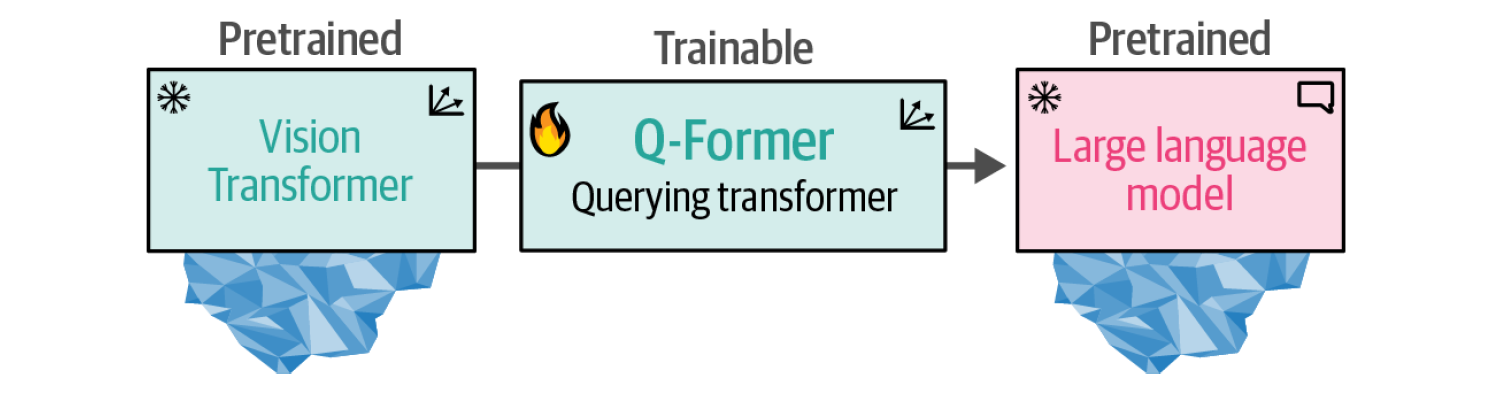
  
#### How the Q-Former Works

To enable communication between the image encoder and the language model, the **Q-Former** mimics the architecture of both models. It has two main modules, each with attention layers, to connect effectively with the respective pretrained models:

- **Image Transformer Module**: This module interacts with the frozen Vision Transformer (ViT) to extract visual features.
- **Text Transformer Module**: This module connects with the LLM, allowing it to process text information effectively.

#### Training Process of the Q-Former

The Q-Former is trained in two stages, one for each modality:

1. **Image Training Stage**: In this stage, image-document pairs (e.g., images and their captions) are used to train the Q-Former to handle both visual and textual data.
2. **Dual Embedding Process**:
   - **Vision Transformer Embeddings**: Images are processed by the frozen ViT, which extracts vision embeddings. These embeddings are then used as inputs to the Q-Former’s Vision Transformer module.
   - **Text Transformer Input**: Captions corresponding to the images are fed as inputs to the Q-Former’s Text Transformer module, enabling it to process and understand language.

By following this staged training approach, BLIP-2 efficiently bridges vision and language, allowing it to perform a wide range of vision-language tasks without the need for training a full multimodal model from scratch. 

With these inputs, the Q-Former is then trained on three tasks:

1. `Image-text matching`: A classification task to predict whether an image and text pair is positive (matched) or negative (unmatched).
2. `Image-text contrastive learning`: This task attempts to align pairs of image and text embeddings such that they maximize their mutual information.
3. `Image-grounded text generation`: Trains the model to generate text based on information extracted from the input image.

This setup enables BLIP-2 to be used for various applications, including image captioning, visual question answering, and image-text retrieval.

In summary, BLIP-2 makes intelligent use of existing technology by training only the Q-Former, a bridge between a pretrained Vision Transformer and a Large Language Model, to accomplish powerful vision-language understanding and generation.




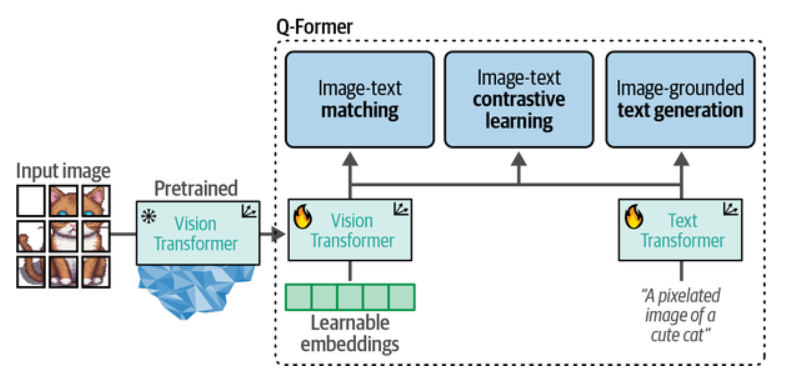

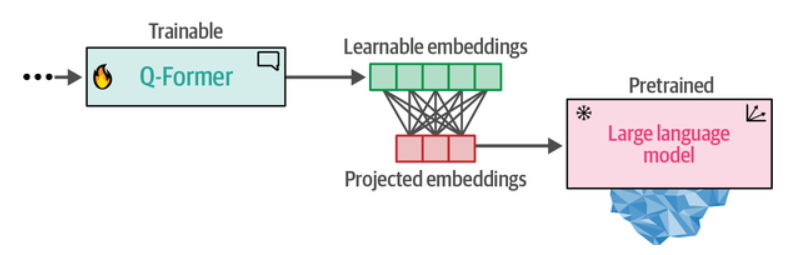

Finally, the learned embeddings from the Q-Former are passed to the LLM through a **projection layer**. The projected embeddings serve as a soft visual prompt.


In [ ]:
# Check for mac or windows and then check for GPU/MPS or CPU
import torch
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

# Load processor and main model
blip_processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
                                                        "Salesforce/blip2-opt-2.7b",
                                                        torch_dtype=torch.float16
                                                    )

model.to(device)

In [ ]:
# The ViT used in the BLIP-2
model.vision_model

In [ ]:
# The LLM used within the BLIP-2
model.language_model

### Preprocessing Images

In [ ]:
# Load image of a supercar
image = Image.open(car_path).convert("RGB")
image

In [ ]:
image.size

In [ ]:
# Preprocess the image
inputs = blip_processor(image, return_tensors="pt").to(device, torch.float16)
inputs["pixel_values"].shape

In [ ]:
inputs["pixel_values"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Convert to numpy and go from (1, 3, 224, 224) to (224, 224, 3) in shape
image_inputs = inputs["pixel_values"][0].detach().cpu().numpy()
image_inputs = np.transpose(image_inputs, (1, 2, 0))  


# Scale image inputs to 0-255 to represent RGB values
scaler = MinMaxScaler(feature_range=(0, 255))
image_inputs = scaler.fit_transform(image_inputs.reshape(-1, image_inputs.shape[-1])).reshape(image_inputs.shape)
image_inputs = np.array(image_inputs, dtype=np.uint8)

# Convert numpy array to Image
Image.fromarray(image_inputs)

In [ ]:
image_inputs

### Preprocessing Text

In [ ]:
# Preprocess the text
text = "Thanks for joining this course"
token_ids = blip_processor(text=text, return_tensors="pt").to(device, torch.float16)
token_ids = token_ids["input_ids"][0]

# Convert input ids back to tokens
tokens = blip_processor.tokenizer.convert_ids_to_tokens(token_ids)
tokens

In [ ]:
token_ids

You might notice a strange symbol at the beginning of some tokens, namely, the `Ġ` symbol. This is actually supposed to be a space. However, an internal function takes characters in certain code points and moves them up by 256 to make them printable. As a result, the space (code point 32) becomes `Ġ` (code point 288).

In [ ]:
# Replace the space token with an underscore
tokens = [token.replace("Ġ", "_") for token in tokens]
tokens

### Use Case 1: Image Captioning

In [ ]:
# Load an AI-generated image of a supercar
image = Image.open(car_path).convert("RGB")

# Convert an image into inputs and preprocess it
inputs = blip_processor(image, return_tensors="pt").to(device, torch.float16)
image

In [ ]:
inputs['pixel_values'].shape

In [ ]:
device

In [ ]:
# Generate image ids to be passed to the decoder (LLM)
generated_ids = model.generate(**inputs, max_new_tokens=100)

# Generate text from the image ids
generated_text = blip_processor.batch_decode(generated_ids, skip_special_tokens=True)
generated_text = generated_text[0].strip()
generated_text

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/7/70/Rorschach_blot_01.jpg"
image = Image.open(urlopen(url)).convert("RGB")
image

In [40]:
inputs = blip_processor(image, return_tensors="pt").to(device, torch.float16)

In [ ]:
# Generate caption
## Preprocessing the image
inputs = blip_processor(images=image, return_tensors="pt").to(device, torch.float32)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = blip_processor.batch_decode(generated_ids, skip_special_tokens=True)
generated_text = generated_text[0].strip()
generated_text

### Use Case 2: Visual Question Answering

In [42]:
# Load an AI-generated image of a supercar
image = Image.open(car_path).convert("RGB")

In [ ]:
image

In [ ]:
# Visual Question Answering
prompt = "Question: Write down what you see in this picture. Answer:"

# Process both the image and the prompt (image + text as an input)
inputs = blip_processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)

# Generate text
generated_ids = model.generate(**inputs, max_new_tokens=30)
generated_text = blip_processor.batch_decode(generated_ids, skip_special_tokens=True)
generated_text = generated_text[0].strip()
generated_text

In [ ]:
# Chat-like prompting
prompt = "Question: Write down what you see in this picture. Answer: A sports car driving on the road at sunset. Question: What would be the cost of this car? Answer:"

# Generate output
inputs = blip_processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=30)
generated_text = blip_processor.batch_decode(generated_ids, skip_special_tokens=True)
generated_text = generated_text[0].strip()
print(generated_text)